# Imports

In [1]:
import sys
sys.path.append('/media/analysis-code/figurefirst/')
%pylab inline
#%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42
from IPython.display import SVG, display
import figurefirst as fifi
import group_data as gd

Populating the interactive namespace from numpy and matplotlib


# Load data

In [2]:
import h5py
#start_db = h5py.File('../02_imaging_post_processing/start_db.hdf5','r')
#stop_db = h5py.File('../02_imaging_post_processing/stop_db.hdf5','r')
trial_db = h5py.File('../02_imaging_post_processing/trial_db.hdf5')

# Stats functions

In [3]:
def resample_dset(trial_db,skey = None,grouping_key = None,sub_selection = None):
    sub_dataset = np.array(trial_db[skey])[sub_selection]
    sub_group = np.array(trial_db[grouping_key])[sub_selection]
    ntrials= len(sub_dataset)
    ngroups = len(set(sub_group))
    resampled_moms = list()
    for rep in range(10):
        shidx = np.random.choice(ntrials, ntrials)
        resampled_trials = sub_dataset[shidx]
        resampled_group = sub_group[shidx]
        resampled_means = group_means(resampled_trials,resampled_group)
        shidx2 = np.random.choice(len(resampled_means),ngroups)
        resampled_moms.append(np.nanmean(resampled_means[shidx2],axis = 0))
    return np.array(resampled_moms)

In [4]:
def group_means(data,groups):
    temp_list = list()
    group_items = list(set(groups))
    for group_item in group_items:
        selection = groups == group_item
        temp_list.append(np.nanmean(data[selection],axis = 0))
    return np.array(temp_list)

# Calculate metadata

## Run calculations

### time series confidence intervals

In [7]:
import group_data as gd
##################################
# Flight Starts
##################################

trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
xi = gd.get_xio('flight_starts')

prestim_ep = (xi < 0) & (xi > -0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight

print 'number of flight initiations GMR22H05 X Gcamp6f:%s'%(sum(sub_selection))
start_data_22H05 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_22H05[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                               'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
    
####    
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight
print 'number of flight initiations GMR39E01 X Gcamp6f:%s'%sum(sub_selection)

start_data_39E01 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_39E01[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight
print 'number of flight initiations GMR22H05 X GFP:%s'%(sum(sub_selection))

start_data_22H05_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_22H05_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight
print 'number of flight initiations GMR39E01 X GFP:%s'%(sum(sub_selection))

start_data_39E01_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_39E01_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
##################################
##################################
# Flight stops
##################################
##################################

xi = gd.get_xio('flight_stops')

trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi > 0) & (xi < 0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight
print 'number of flight terminations GMR22H05 X GcAMP6f:%s'%(sum(sub_selection))

stop_data_22H05 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    stop_data_22H05[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                               'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####    
trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi > 0) & (xi < 0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection & prestim_flight
print 'number of flight terminations GMR39E01 X GcAMP6f:%s'%sum(sub_selection)

stop_data_39E01 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    stop_data_39E01[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

##################################
##################################
#trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
#genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
#two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
#grouping_key = 'fly_numbers'

#prestim_ep = (xi > 0) & (xi < 0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
#sub_selection = trial_selection & genotype_selection & prestim_flight

#print 'number of flight terminations GMR22H05 X GFP:%s'%sum(sub_selection)
#stop_data_22H05_c = dict()
#for skey in two_d_sigs:
#    resampled_moms = resample_dset(trial_db,skey = skey,
#                                   grouping_key = grouping_key,
#                                   sub_selection = sub_selection)
#    stop_data_22H05_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
#                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
#                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
#                                          np.array(trial_db[grouping_key])[sub_selection]),
#                                          axis = 0)}
####
#trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
#genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
#two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
#grouping_key = 'fly_numbers'

#prestim_ep = (xi > 0) & (xi < 0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
#sub_selection = trial_selection & genotype_selection & prestim_flight

#print 'number of flight terminations GMR39E01 X GFP:%s'%sum(sub_selection)
#stop_data_39E01_c = dict()
#for skey in two_d_sigs:
#    resampled_moms = resample_dset(trial_db,skey = skey,
#                                   grouping_key = grouping_key,
#                                   sub_selection = sub_selection)
#    stop_data_39E01_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
#                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
#                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
#                                          np.array(trial_db[grouping_key])[sub_selection]),
#                                          axis = 0)}

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in greater


number of flight initiations GMR22H05 X Gcamp6f:441
number of flight initiations GMR39E01 X Gcamp6f:173
number of flight initiations GMR22H05 X GFP:22

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in greater
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:79: RuntimeWarning: invalid value encountered in greater



number of flight initiations GMR39E01 X GFP:7
number of flight terminations GMR22H05 X GcAMP6f:394

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:107: RuntimeWarning: invalid value encountered in greater
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:128: RuntimeWarning: invalid value encountered in greater



number of flight terminations GMR39E01 X GcAMP6f:135


In [230]:
def resample_timeseries(trial_db,skey = None,
                          grouping_key = None,
                          sub_selection = None):
    #select out the subselection - usually all data from the correct
    #genotype,trial-type ect
    sub_dataset = np.array(trial_db[skey])[sub_selection]
    #get the grouping keys for the sub-selection
    sub_group = np.array(trial_db[grouping_key])[sub_selection]
    #little n
    ntrials= len(sub_dataset)
    #Big N
    ngroups = len(set(sub_group))
    #put the mean of means in here
    N_resampled_means = list()
    for N_rep in range(10):
        n_resampled_means = list()
        for n_rep,gkey in enumerate(set(sub_group)):
            group_selection = sub_dataset[sub_group == gkey]
            n = np.shape(group_selection)[0]
            ridx = np.random.choice(n,n)
            n_resampled_means.append(np.nanmean(group_selection[ridx,:],axis = 0))
        n_resampled_means = np.array(n_resampled_means)
        N = np.shape(n_resampled_means)[0]
        ridx = np.random.choice(N,N)
        

    return{'ub':np.nanpercentile(N_resampled_means,97.5,axis = 0),
           'lb':np.nanpercentile(N_resampled_means,2.25,axis = 0),
           'm':np.nanpercentile(N_resampled_means,50.0,axis = 0)}

def resample_difference(trial_db,skey = None,
                          grouping_key = None,
                          sub_selection = None,
                          idx1 = None, idx2 = None):
    #select out the subselection - usually all data from the correct
    #genotype,trial-type ect
    sub_dataset = np.array(trial_db[skey])[sub_selection]
    #get the grouping keys for the sub-selection
    sub_group = np.array(trial_db[grouping_key])[sub_selection]
    #little n
    ntrials= len(sub_dataset)
    #Big N
    ngroups = len(set(sub_group))
    #put the mean of means in here
    N_resampled_means = list()
    N_resampled_null = list()
    N_means = list()
    N_resampled_tser = list()
    
    for N_rep in range(30):
        n_resampled_means = list()
        n_means = list()
        for n_rep,gkey in enumerate(set(sub_group)):
            group_selection = sub_dataset[sub_group == gkey]
            n = np.shape(group_selection)[0]
            ridx = np.random.choice(n,n)
            n_resampled_means.append(np.nanmean(group_selection[ridx,:],axis = 0))
            n_means.append(np.nanmean(group_selection[ridx,:],axis = 0))
            
        n_resampled_means = np.array(n_resampled_means)
        n_means = np.array(n_means)
        N = np.shape(n_resampled_means)[0]
        ridx = np.random.choice(N,N)
        #print np.shape(n_resampled_means[ridx,idx1])
        #print np.shape(n_resampled_means[ridx,idx2])
        N_resampled_means.append(np.nanmean(np.nanmean(n_resampled_means[ridx,idx2],axis = 0) - 
                                            np.nanmean(n_resampled_means[ridx,idx1],axis = 0)))
        N_means.append(np.nanmean(np.nanmean(n_means[:,idx2],axis = 1) - np.nanmean(n_means[:,idx1],axis = 1)))
        
        N_resampled_tser.append(np.nanmean(n_resampled_means[ridx,:],axis = 0))
        
        null_1 = np.where(np.random.choice(2,N),np.nanmean(n_resampled_means[ridx,idx2],axis = 0),
                                             np.nanmean(n_resampled_means[ridx,idx1],axis = 0))
        null_2 = np.where(np.random.choice(2,N),np.nanmean(n_resampled_means[ridx,idx2],axis = 0),
                                             np.nanmean(n_resampled_means[ridx,idx1],axis = 0))
        
        N_resampled_null.append(np.nanmean(np.nanmean(null_1,axis = 0)-
                                           np.nanmean(null_2,axis = 0)))
    N_mean= np.nanmean(N_means)
    p = np.sum(np.abs(N_resampled_null)>np.abs(N_mean))/np.float(len(N_means))
    return{'ts_ub':np.nanpercentile(N_resampled_tser,97.5,axis = 0),
           'ts_lb':np.nanpercentile(N_resampled_tser,2.25,axis = 0),
           'ts_m':np.nanpercentile(N_resampled_tser,50.0,axis = 0),
           'ub':np.nanpercentile(N_resampled_means,97.5,axis = 0),
           'lb':np.nanpercentile(N_resampled_means,2.25,axis = 0),
           'md':np.nanpercentile(N_resampled_means,50.0,axis = 0),
           'p':p,
           'N':ngroups}

In [268]:
##################################
# Flight Starts 22H05
##################################
xi = gd.get_xio('flight_starts')
idx1 = np.argwhere((xi<0) & (xi>-3))
idx2 = np.argwhere((xi<3.0) & (xi>0))

trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
xi = gd.get_xio('flight_starts')

prestim_ep = (xi < 0) & (xi > -0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight

print 'number of flight initiations GMR22H05 X Gcamp6f:%s'%(sum(sub_selection))
start_data_22H05 = dict()
start_diff_22H05 = dict()
for skey in two_d_sigs:
    start_diff_22H05[skey] = resample_difference(trial_db,skey = skey,
                                           grouping_key = grouping_key,
                                           sub_selection = sub_selection,
                                           idx1 = idx1,idx2 = idx2)
    
##################################
# Flight Starts 39E01
##################################
xi = gd.get_xio('flight_starts')
idx1 = np.argwhere((xi<0) & (xi>-3))
idx2 = np.argwhere((xi<3.0) & (xi>0))

trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
xi = gd.get_xio('flight_starts')

prestim_ep = (xi < 0) & (xi > -0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight

print 'number of flight initiations GMR39E01 X Gcamp6f:%s'%(sum(sub_selection))
start_data_39E01 = dict()
start_diff_39E01 = dict()
for skey in two_d_sigs:
    start_diff_39E01[skey] = resample_difference(trial_db,skey = skey,
                                           grouping_key = grouping_key,
                                           sub_selection = sub_selection,
                                           idx1 = idx1,idx2 = idx2)
    
##################################
# Flight stops 22H05
##################################
xi = gd.get_xio('flight_stops')
idx1 = np.argwhere((xi<0) & (xi>-3))
idx2 = np.argwhere((xi<1) & (xi>0))

trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
xi = gd.get_xio('flight_stops')

prestim_ep = (xi > 0) & (xi < 0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight

print 'number of flight initiations GMR22H05 X Gcamp6f:%s'%(sum(sub_selection))
stop_diff_22H05 = dict()
for skey in two_d_sigs:
    stop_diff_22H05[skey] = resample_difference(trial_db,skey = skey,
                                           grouping_key = grouping_key,
                                           sub_selection = sub_selection,
                                           idx1 = idx1,idx2 = idx2)
    
##################################
# Flight stops 39E01
##################################
xi = gd.get_xio('flight_stops')
idx1 = np.argwhere((xi<0) & (xi>-3))
idx2 = np.argwhere((xi<1) & (xi>0))

trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
xi = gd.get_xio('flight_stops')

prestim_ep = (xi > 0) & (xi < 0.5)
prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<20
sub_selection = trial_selection & genotype_selection & prestim_flight

print 'number of flight initiations GMR39E01 X Gcamp6f:%s'%(sum(sub_selection))
stop_diff_39E01 = dict()
for skey in two_d_sigs:
    stop_diff_39E01[skey] = resample_difference(trial_db,skey = skey,
                                           grouping_key = grouping_key,
                                           sub_selection = sub_selection,
                                           idx1 = idx1,idx2 = idx2)

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


number of flight initiations GMR22H05 X Gcamp6f:441


/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in double_scalars
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in greater
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in greater


number of flight initiations GMR39E01 X Gcamp6f:173


/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: RuntimeWarning: invalid value encountered in greater


number of flight initiations GMR22H05 X Gcamp6f:394


/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:92: RuntimeWarning: invalid value encountered in greater


number of flight initiations GMR39E01 X Gcamp6f:136


In [273]:
data_dict = {'init_22H05':start_diff_22H05,
             'init_39E01':start_diff_39E01,
             'term_22H05':stop_diff_22H05,
             'term_39E01':stop_diff_39E01,}

## Save calculations

In [274]:
import cPickle
with open('start_stop_data_dict','wb') as f:
    cPickle.dump(data_dict, f)

## Load calculations

In [5]:
import cPickle
with open('start_stop_data_dict','rb') as f:
    data_dict = cPickle.load(f)

# Plot settings

In [6]:
lookup_ybound = {'Ph1':(-90,90),
                 'Ph0':(-90,90),
                 'wb_frequency':(0,250),
                 'b1':(0.0,1.5),
                 'b2':(0.0,0.5),
                 'b3':(0.0,3),
                 'i1':(0.0,3),
                 'i2':(0.0,3),
                 'iii1':(0.0,2),
                 'iii3':(0.0,2),
                 'iii24':(0.0,2),
                 'hg1':(0.0,12),
                 'hg2':(0.0,12),
                 'hg3':(0.0,3),
                 'hg4':(0.0,3),
                 'tpd':(0.0,1.0),
                 'tpv':(0.0,1.0),
                 'ttm':(0.0,1.0),
                 'pr':(0.0,1.0)}

sb = {'Ph1':(-90,60),
      'b1':(0,1.0),
      'b2':(0,0.5),
      'b3':(0,2.0),
      'hg1':(0,6.0),
      'hg2':(0,6.0),
      'hg3':(0,2.0),
      'hg4':(0,1.0),
      'i1':(0,2.0),
      'i2':(0,2.0),
      'iii1':(0,1.0),
      'iii24':(0,1.0),
      'iii3':(0,2.0),
      'wb_frequency':(0,250)}

# Plot figure

## Summary functions

In [7]:
def get_kde(X,xrng = [0,5],bandwidth = 0.1):
    from sklearn.neighbors import KernelDensity
    #X = np.mean(data_chunk[:,49:51],axis = 1)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    X_plot = np.linspace(xrng[0], xrng[1], 200)[:, np.newaxis]
    print shape(X_plot)
    print shape(X)
    log_dens = kde.score_samples(X_plot)
    return X_plot,np.exp(log_dens)

def get_dta(sig):
    stripe_fix = np.array(trial_db['trial_names']) == 'stripe_fix'
    exp_genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
    ctl_genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
    wb_exp = np.array(trial_db['wb_frequency'])[stripe_fix & exp_genotype_selection].ravel()
    dta_exp = np.array(trial_db[sig])[stripe_fix & exp_genotype_selection].ravel()
    dta_exp = dta_exp[~np.isnan(dta_exp) & (wb_exp>100)]
    wb_ctl = np.array(trial_db['wb_frequency'])[stripe_fix & ctl_genotype_selection].ravel()
    dta_ctl = np.array(trial_db[sig])[stripe_fix & ctl_genotype_selection].ravel()
    dta_ctl = dta_ctl[~np.isnan(dta_ctl) & (wb_ctl>100)]
    return dta_exp,dta_ctl
    
def plot_kdensity(sig):
    dta_exp,dta_ctl = get_dta(sig)
    X_plot,density = get_kde(np.array([dta_exp]).T)
    plot(X_plot,density)
    X_plot,density = get_kde(np.array([dta_ctl]).T)
    plot(X_plot,density)
    
def plot_cdf(sig):
    dta_exp,dta_ctl = get_dta(sig)
    dta_exp = gd.signal_plot_info[sig]['transform'](dta_exp)
    dta_ctl = gd.signal_plot_info[sig]['transform'](dta_ctl)
    
    step(np.sort(dta_ctl),
         np.linspace(0,1,len(dta_ctl)),c = 'g',clip_on = False)
    
    step(np.sort(dta_exp),
         np.linspace(0,1,len(dta_exp)),c = 'b',clip_on = False)
    
    ff.mpl_functions.adjust_spines(plb.gca(),'none', 
              spine_locations={}, 
              smart_bounds=True, 
              xticks=None, 
              yticks=None, 
              linewidth=1)
    plb.gca().set_xbound(*lookup_ybound[sig])

In [8]:
def fix_nan(s):
    for idx in np.argwhere(~np.isfinite(s)):
        if idx+1 < len(s):
            if np.isfinite(s[idx-1]):
                if np.isfinite(s[idx+1]):
                    s[idx] = np.mean([s[idx-1],s[idx+1]])
    return s

In [322]:
sfix_mask = np.array(trial_db['trial_names']) == 'stripe_fix'
sfix_mask &= (np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+')

sfix_flies = np.array(trial_db['fly_numbers'])[sfix_mask]
fly_set = set(sfix_flies) # flies that have good stripe fixation

# calculate histograms of F during stripe fixation
muscle_list = ['b1','b2','b3','i1','i2','iii1','iii24','iii3','hg1','hg2','hg3','hg4']
hist_dict = dict()
# for muscle hists
for muscle in muscle_list:
    hist_mtrx = list()
    bins = np.linspace(-4,4,100)
    for fly in list(fly_set):
        fly_mask = np.array(trial_db['fly_numbers']) == fly
        mask = sfix_mask & fly_mask
        flight_mask = np.array(trial_db['wb_frequency'])[mask] > 50.0
        data = np.array(trial_db[muscle])[mask][flight_mask]
        data -= np.mean(data)
        data /= np.std(data)
        data = data[np.isfinite(data)]
        #plb.plot(data.ravel())
        lns = plb.histogram(data.ravel()[np.isfinite(data.ravel())],bins = bins,normed = True)
        hist_mtrx.append(lns[0])
        #plb.plot(lns[1][:-1],lns[0],color = 'k')
    print muscle
    hist_dict[muscle] = hist_mtrx

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


b1
b2
b3
i1
i2
iii1
iii24
iii3
hg1
hg2
hg3


/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


hg4


In [330]:
len(fly_set)

58

## make plot

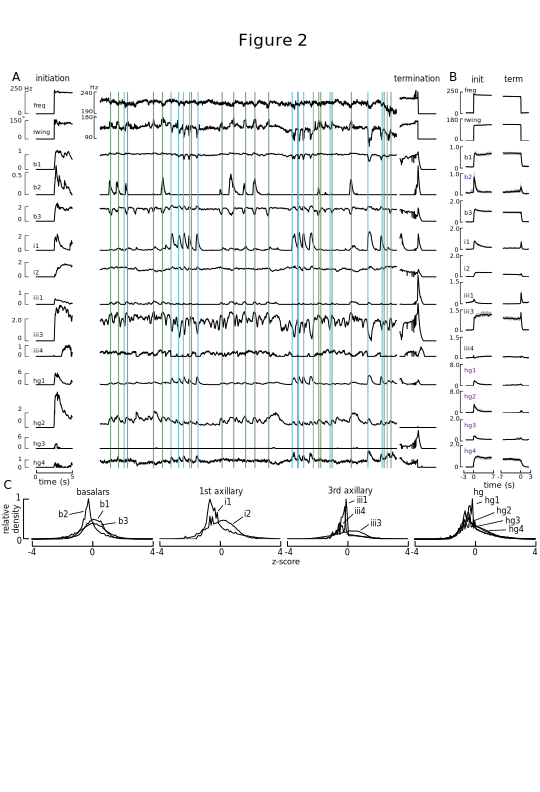

In [331]:
xi = gd.get_xio('flight_starts')

layout = fifi.FigureLayout('figure_2_layout.svg')
layout.make_mplfigures()
def plot_gd(group_key):
    xi = gd.get_xio({'term':'flight_stops','init':'flight_starts'}[group_key.split('_')[0]])
    #print xi[0]
    r1 = (xi>-7) & (xi<3)
    r2 = (xi>-3) & (xi<7)
    rng = {'term':r1,'init':r2}[group_key.split('_')[0]]
    layout_group = layout.axes_groups['none'][group_key]
    for skey in layout_group.keys():
        ax = layout_group[skey]['axis']
        # experimental data
        fill_kwargs = {'alpha':0.3,'clip_on':False,'lw':0,'color':'k'}
        ub = np.array(data_dict[group_key][skey]['ts_ub'])
        lb = np.array(data_dict[group_key][skey]['ts_lb'])
        m = np.array(data_dict[group_key][skey]['ts_m'])
        ### transform into natural units
        ub = gd.signal_plot_info[skey]['transform'](ub)
        lb = gd.signal_plot_info[skey]['transform'](lb)
        m = gd.signal_plot_info[skey]['transform'](m)
        if skey == 'Ph1':
            if 'init' in group_key:
                ub[xi<0] = -90
                lb[xi<0] = -90
                m[xi<0] = -90
            else:
                ub[xi>0] = -90
                lb[xi>0] = -90
                m[xi>0] = -90
        m,lb,ub = [fix_nan(s) for s in [m,lb,ub]]
        ax.fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
        ax.plot(xi[rng],m[rng],color = fill_kwargs['color'])

        
        # control data
        #fill_kwargs = {'alpha':0.3,'clip_on':False,'lw':0,'color':'g'}
        #ub = np.array(data_dict[group_key+'_c'][skey]['ub'])
        #lb = np.array(data_dict[group_key+'_c'][skey]['lb'])
        #m = np.array(data_dict[group_key+'_c'][skey]['m'])
        ### transform into natural units
        #ub = gd.signal_plot_info[skey]['transform'](ub)
        #lb = gd.signal_plot_info[skey]['transform'](lb)
        #m = gd.signal_plot_info[skey]['transform'](m)
        #ax.fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
        #ax.plot(xi[rng],m[rng],color = fill_kwargs['color'])
        
        fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
        gca().set_ybound(lookup_ybound[skey])

[plot_gd(group_key) for group_key in layout.axes_groups['none'].keys() if not(group_key in ['deltaF_CDFs',
                                                                                    'traces_term',
                                                                                    'traces_init',
                                                                                    'traces','sac',
                                                                                    'scale_bars','histograms'])]

#######################
##
#######################

#fly = gd.swarms['GMR22H05'].flies[11]
fly = gd.swarms['GMR22H05'].flies[10]
#fly = gd.swarms['GMR22H05_pr'].flies[5]
#fly = gd.swarms['GMR22H05_pr'].flies[11]

fly.open_fly_record()
muscle_sigs = fly.get_pkl_data('nnls_fits_bk_sub_F.cpkl')
axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase']

xi = gd.get_xio('flight_starts')
dt = xi[1]-xi[0]

sf = layout.axes_groups['none']['traces']['b1'].w/layout.axes_groups['none']['traces_init']['b1'].w
time_scale_factor = sf

#scale the large time_series by the size of the start/stop windows
small_window_epoch_len = 5
small_window_samps = np.int(5.0/dt)
large_window_samps = np.int(small_window_samps*time_scale_factor)
#find the indexs for the start and stop
import flylib as flb
thresh_sig = axon_sigs['wb_frequency']
idxs = flb.idx_by_thresh(np.array(thresh_sig),50.0)

#start_idx = idxs[2][0]
#stop_idx = idxs[4][-1]

start_idx = idxs[0][0]
stop_idx = idxs[0][-1]
endidx = (stop_idx-start_idx-1000)/2#30000

for skey in layout.axes_groups['none']['traces'].keys():
    if skey in ['Ph1','wb_frequency']:
        signal = axon_sigs[skey]
    else:
        signal = muscle_sigs['fits'][muscle_sigs['muscles'].index(skey)]
    signal = gd.signal_plot_info[skey]['transform'](np.array(signal))
    
    ax = layout.axes_groups['none']['traces'][skey]['axis']
    #ax.plot([3,1,2,3])
    ax.plot(signal[endidx-large_window_samps:endidx],color = 'k',clip_on = False)
    
    fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
    
    if skey in ['wb_frequency']:
        ax.set_ybound(190,240)
    elif skey in ['Ph1']:
        ax.set_ybound(20,70)
    else: 
        ax.set_ybound(*lookup_ybound[skey])
        
    ax.set_xbound(0,large_window_samps)
    
for skey in layout.axes_groups['none']['traces_init'].keys():
    
    if skey in ['wb_frequency']:
        signal = axon_sigs[skey]
    elif skey in ['Ph1']:
        signal = np.array(axon_sigs[skey])
    else:
        signal = muscle_sigs['fits'][muscle_sigs['muscles'].index(skey)]
    signal = gd.signal_plot_info[skey]['transform'](np.array(signal))
    if skey in ['Ph1']:
        signal[start_idx-(small_window_samps/2):start_idx] = -90
    
    ax = layout.axes_groups['none']['traces_init'][skey]
    ax.plot(signal[start_idx-(small_window_samps/2):start_idx+(small_window_samps/2)],color = 'k',clip_on = False)
    ax.set_ybound(*lookup_ybound[skey])
    #ax.plot(signal[endidx-large_window_samps:endidx],color = 'k',clip_on = False)
    fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=0)
    #if skey in ['wb_frequency']:
    #    ax.set_ybound(200,210)
    #elif skey in ['Ph1']:
    #    ax.set_ybound(0,90)
    #else: 
    ax.set_ybound(*lookup_ybound[skey])
    ax.set_xbound(0,small_window_samps)
    
for skey in layout.axes_groups['none']['traces_term'].keys():
    xi = gd.get_xio('flight_start')
    if skey in ['wb_frequency']:
        signal = axon_sigs[skey]
    elif skey in ['Ph1']:
        signal = np.array(axon_sigs[skey])
    else:
        signal = muscle_sigs['fits'][muscle_sigs['muscles'].index(skey)]
    signal = gd.signal_plot_info[skey]['transform'](np.array(signal))
    if skey in ['Ph1']:
        signal[stop_idx:] = -90
        
    ax = layout.axes_groups['none']['traces_term'][skey]
    ax.plot(signal[stop_idx-(small_window_samps/2):stop_idx+(small_window_samps/2)],color = 'k',clip_on = False)
    ax.set_ybound(*lookup_ybound[skey])
    #ax.plot(signal[endidx-large_window_samps:endidx],color = 'k',clip_on = False)
    fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
    #if skey in ['wb_frequency']:
    #    ax.set_xbound(200,210)
    #elif skey in ['Ph1']:
    #    ax.set_xbound(0,90)
    #else: 
    ax.set_ybound(*lookup_ybound[skey])
    ax.set_xbound(0,small_window_samps)

for group_name,ax_group in layout.axes_groups['none'].items():
    if not(group_name in ['traces','sac','histograms']):
        for sigkey,ax in ax_group.items():
            ax.set_ybound(*lookup_ybound[sigkey])
        
#for skey,ax in layout.axes_groups['deltaF_CDFs'].items():
#    plb.sca(ax['axis'])
#    plot_cdf(skey)
#    gca().set_xbound(*lookup_ybound[skey])
    
    #['iii24'].set_ybound(0,2)
############################
############################ 
sig = np.array(axon_sigs['Ph1'])
#tsig = gd.signal_plot_info['Ph1']['transform'](np.array(sig))[endidx-large_window_samps:endidx]
example_signal = sig[endidx-large_window_samps:endidx]
import flylib as flb
import scipy
xi = gd.get_xio('yaw_left')
############################
############################
## from the roc analysis 
ks = 95, 
ms = 14,
thresh = 0.38
############################
############################

#plb.subplot(3,2,2,sharey = plb.gca())
from scipy import signal
trend = signal.medfilt(example_signal,kernel_size = ks)
detrend = example_signal-trend
detrend_smooth = signal.wiener(detrend,mysize = ms)
noise = detrend - detrend_smooth

import flylib as flb
rightward_list = flb.idx_by_thresh(detrend_smooth,thresh)
leftward_list = flb.idx_by_thresh(detrend_smooth*-1,thresh)

rightward_list = [x for x in rightward_list if len(x)>3]
leftward_list = [x for x in leftward_list if len(x)>3]

rightward_list = [x[0]+np.argmax(detrend_smooth[x]) for x in rightward_list]
leftward_list = [x[0]+np.argmax(detrend_smooth[x]) for x in leftward_list]
#plb.figure(figsize = (30,4))
#plb.plot(tsig)
#plb.twinx()
#plb.plot(detrend_smooth>thresh,color = 'r')
#plb.plot(detrend_smooth<(thresh*-1),color = 'g')
ax = layout.axes['sac']

kwargs = layout.pathspecs['sac_right'].mplkwargs()
for rs in rightward_list:
    ax.axvline(rs,**kwargs)
    
kwargs = layout.pathspecs['sac_left'].mplkwargs()    
for ls in leftward_list:
    ax.axvline(ls,**kwargs)

for ax_key,ax in layout.axes.items():
    if ax_key[0] == 'scale_bars':
        ax.plot([1,0,0,1],
                [sb[ax_key[1]][0],sb[ax_key[1]][0],
                 sb[ax_key[1]][1],sb[ax_key[1]][1]],
                clip_on = False,color = 'k',lw = 0.5)
        ax.set_ybound(*lookup_ybound[ax_key[1]])
    fifi.mpl_functions.kill_spines(ax)
        
#[ for ax in layout.axes.values()]
for muscle in ['b1','b2','b3']:
    layout.axes[('histograms','basalars')].plot(bins[:-1],np.nanmean(np.array(hist_dict[muscle]),axis = 0),color = 'k',alpha = 1)
    layout.axes[('histograms','basalars')].set_xbound(-4,4)
for muscle in ['i1','i2']:
    layout.axes[('histograms','ax1')].plot(bins[:-1],np.nanmean(np.array(hist_dict[muscle]),axis = 0),color = 'k',alpha = 1)
    layout.axes[('histograms','ax1')].set_xbound(-4,4)
for muscle in ['iii1','iii24','iii3']:
    layout.axes[('histograms','ax3')].plot(bins[:-1],np.nanmean(np.array(hist_dict[muscle]),axis = 0),color = 'k',alpha = 1)
    layout.axes[('histograms','ax3')].set_xbound(-4,4)
for muscle in ['hg1','hg2','hg3','hg4']:
    layout.axes[('histograms','hg')].plot(bins[:-1],np.nanmean(np.array(hist_dict[muscle]),axis = 0),color = 'k',alpha = 1)
    layout.axes[('histograms','hg')].set_xbound(-4,4)
    
layout.axes['sac'].set_xbound(0,large_window_samps)      
#plb.gca().set_ybound(-1,2)
#############################
#############################
fifi.mpl_functions.adjust_spines(ax,'none', 
              spine_locations={}, 
              smart_bounds=True, 
              xticks=None, 
              yticks=None, 
              linewidth=1)

plb.close('all')
layout.insert_figures('mpl_panel_a')
layout.set_layer_visibility('Layer 1',False)
layout.set_layer_visibility('gray_bk',False)
layout.write_svg('figure_2.svg')
display(SVG('figure_2.svg'))

In [196]:
sfix_mask = np.array(trial_db['trial_names']) == 'stripe_fix'
#sfix_mask &= (np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+') | \
#(np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+')
sfix_mask &= (np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+')

sfix_flies = np.array(trial_db['fly_numbers'])[sfix_mask]

fly_set = set(sfix_flies) # flies that have good stripe fixation

# calculate histograms of F during stripe fixation
muscle_list = ['b1','b2','b3','i1','i2','iii1','iii24','iii3','hg1','hg2','hg3','hg4']
hist_dict = dict()
# for muscle hists
for muscle in muscle_list:
    hist_mtrx = list()
    bins = np.linspace(-10,10,100)
    for fly in list(fly_set):
        fly_mask = np.array(trial_db['fly_numbers']) == fly
        mask = sfix_mask & fly_mask
        flight_mask = np.array(trial_db['wb_frequency'])[mask] > 50.0
        data = np.array(trial_db[muscle])[mask][flight_mask]
        data -= np.mean(data)
        data /= np.std(data)
        data = data[np.isfinite(data)]
        #plb.plot(data.ravel())
        lns = plb.histogram(data.ravel()[np.isfinite(data.ravel())],bins = bins,normed = True)
        hist_mtrx.append(lns[0])
        #plb.plot(lns[1][:-1],lns[0],color = 'k')
    print muscle
    hist_dict[muscle] = hist_mtrx

In [ ]:
#plb.imshow(hist_mtrx,aspect = 'auto')
plb.figure(figsize = (20,1))
subplot(1,len(muscle_list)+1,1)
for i, muscle in enumerate(muscle_list):
    print muscle
    subplot(1,len(muscle_list)+1,i+1)
    lns = plb.plot(bins[:-1],np.nanmean(np.array(hist_dict[muscle]),axis = 0),color = 'k',alpha = 1)
    #hs = np.nanmean(np.array(hist_dict[muscle]),axis = 0)
    #plb.plot(bins[:-1],np.cumsum(hs)/(np.sum(hs)))
    plb.gca().set_xbound(-5,5)
    #plb.gca().set_xbound(-1,2)
    #plb.gca().set_yscale('log')
    #if i == 0:
    #    fifi.mpl_functions.adjust_spines(plb.gca(),['left','bottom'])
    #else:
    #    fifi.mpl_functions.adjust_spines(plb.gca(),['bottom'])

In [73]:
hists = list()
for fly in fly_set:
    print fly
    fly_mask = np.array(trial_db['fly_numbers']) == fly
    mask = sfix_mask & fly_mask
    data = np.array(trial_db['Xpos'])[mask]
    hists.append(np.histogram((data.ravel()[np.isfinite(data.ravel())]/10.0)*96,bins =96,normed = True)[0])

990
991
992
481
656
657
658
659
660
661
662
1014
988
989
308
309
310
311
312
314
315
316
317
318
319
320
321
322
323
324
325
327
328
329
330
331
332
333
334
335
336
995
996
485
998
495
496
497
498
500
501
453
455
456
461
462
463
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
993
994
483
484
997
486
999
488
489
490
491
492
493
494
1007
1008
1009
1010
1011
1012
1013
502
1015
1016
1017
1018


In [92]:
def resample_hist(hist_array,reps = 100):
    resamples = list()
    n = np.shape(hist_array)[0]
    iar = np.arange(n)
    for rep in range(reps):
        idxs = np.random.choice(iar,n)
        resamples.append(np.mean(hist_array[idxs],axis = 0))
    mn = np.mean(hist_array,axis = 0)
    ub = np.percentile(resamples,97.5,axis = 0)
    lb = np.percentile(resamples,2.25,axis = 0)
    return mn,ub,lb

In [93]:
mn,ub,lb = resample_hist(np.array(hists))

In [35]:
rad_per_pix = deg2rad(360/96.0)

In [36]:
front_pos = 67

In [58]:
rad_array = np.linspace(0,2*pi,96)
rad_array -= front_pos*rad_per_pix

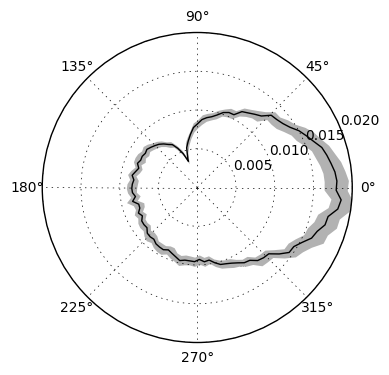

In [101]:
plb.subplot(1,1,1,projection = 'polar')
plb.fill_between(rad_array,ub,lb,color = 'k',alpha = 0.3,lw = 0)
plb.plot(rad_array,mn,color = 'k')
plb.gca().set_ybound(0,0.020)

In [34]:
def plot_q_q(sig):
    sig = 'iii24'
    stripe_fix = np.array(trial_db['trial_names']) == 'stripe_fix'
    exp_genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
    ctl_genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
    #kde_data = dict()
    dta_exp = np.array(trial_db[sig])[stripe_fix & exp_genotype_selection].ravel()
    dta_exp = dta_exp[~np.isnan(dta_exp)]
    dta_ctl = np.array(trial_db[sig])[stripe_fix & ctl_genotype_selection].ravel()
    dta_ctl = dta_ctl[~np.isnan(dta_ctl)]

    quantiles = np.linspace(0,100,1000)#percentiles

    exp_quantiles = [np.percentile(dta_exp,q) for q in quantiles]
    ctl_quantiles = [np.percentile(dta_ctl,q) for q in quantiles]
    step(exp_quantiles,ctl_quantiles)
    gca().set_xbound(0,9)
    gca().set_ybound(0,9)

In [107]:
plb.plot(signal[start_idx-(small_window_samps/2):start_idx+(small_window_samps/2)])
plb.plot(signal[stop_idx-(small_window_samps/2):stop_idx+(small_window_samps/2)])

In [199]:
fly = gd.swarms['GMR22H05_pr'].flies[10]
#fly = gd.swarms['GMR22H05_pr'].flies[11]

fly.open_fly_record()
muscle_sigs = fly.get_pkl_data('nnls_fits_bk_sub_F.cpkl')
axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase']

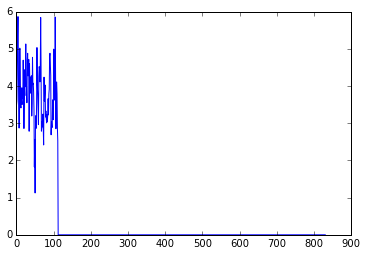

In [222]:
plb.plot(axon_sigs['Ph1'][::100])

In [ ]:
import flylib as flb
hists = list()
#fly = gd.swarms['GMR22H05_pr'].flies[11]
for fly in gd.swarms['GMR22H05_pr'].flies:
    fly.open_fly_record()
    bins = np.arange(0,2*pi,2*pi/96.0)
    axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase'] 
    stripesig = np.array(axon_sigs['Xpos'])
    stripesig -= min(stripesig)
    stripesig /= max(stripesig)
    stripesig *= 2*pi
    idx = flb.idx_by_thresh(around(np.array(axon_sigs['StimCond']))<0,0.5)[0]
    idx = argwhere(np.array(axon_sigs['wb_frequency'])[idx]>150.0)
    h = histogram(stripesig[idx],bins = bins,normed = True)[0]
    h[0] = h[-1]
    h = hstack((h,h[0]))
    hists.append(h)

In [ ]:
subplot(1,1,1,polar = True)
plot(bins,hists[8])

In [ ]:
subplot(1,1,1,polar = True)
plot(bins,np.mean(hists,axis = 0))
ub = np.mean(hists,axis = 0)+np.std(hists,axis = 0)
lb = np.mean(hists,axis = 0)-np.std(hists,axis = 0)
fill_between(bins,ub,lb,lw = 0)
plot(bins,np.mean(hists,axis = 0))
savefig('spos_group.pdf')

In [ ]:
shape(hists)

In [ ]:
idx = find(np.array(muscle_sigs['muscles']) == 'b1')[0]
sig = np.array(muscle_sigs['fits'][idx])

In [ ]:
testsig = sig[0:1000]
plot(testsig)

In [ ]:
import pyfnnd

In [ ]:
n_best, c_best, LL, theta_best = pyfnnd.deconvolve(testsig,dt = 0.021,verbosity=1,learn_theta=(None, None, None, None, None),
    spikes_tol=1E-6, params_tol=1E-6,rate = 500,tau = 2.0)

In [ ]:
from scipy.signal import find_peaks_cwt
idxs = find_peaks_cwt(n_best,np.arange(1,2))

In [ ]:
subplot(2,1,1)
plot(testsig[:1000])
subplot(2,1,2)
plot(n_best[:1000])
plot(idxs[:100],n_best[idxs[:100]],'o')